<a href="https://colab.research.google.com/github/macdinh99/LSTM_GRU_Hydrid/blob/main/GRUvsLSTM_hydrid_Ver2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buoc 1: Khai bao thu vien lam viec

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
#Cac lop xay dung mo hinh
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.layers import Dense
#Kiem tra do chinh xac
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance

Buoc 2: Doc du lieu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Doc du lieu tu csv
df=pd.read_csv('/content/drive/MyDrive/VNindex_Ver4.csv')

Buoc 3: Mo ta va dinh dang du lieu

In [4]:
#Dinh dang cau truc theo time series
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")

In [5]:
#Dinh dang du lieu kieu Object thanh Float
df["Price"] = df["Price"].str.replace(",", "").astype(float)

In [6]:
df = df.sort_values('Date', ascending=True)

In [7]:
print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2008-07-14 00:00:00
Ending date:  2023-07-14 00:00:00
Duration:  5478 days 00:00:00


In [ ]:
df.describe()

Buoc 4: Chuan bi xu ly du lieu

In [ ]:
#Phan lay va xu ly du lieu

In [8]:
df2=df.copy()

In [9]:
#Lay du lieu ngay va ket phien giao dich
df2=df2[['Date','Price']]

In [10]:
df2 = df2.sort_values('Date', ascending=True)
df2.index=df2.Date

In [11]:
#Chuan hoa mo hinh
del df2['Date']
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df2.shape)

(3747, 1)


In [12]:
#Chia tap du lieu
training_size=int(len(df2)*0.80)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2997, 1)
test_data:  (750, 1)


In [13]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2946, 50)
y_train:  (2946,)
X_test:  (699, 50)
y_test (699,)


In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2946, 50, 1)
X_test:  (699, 50, 1)


In [ ]:
X_train
X_test

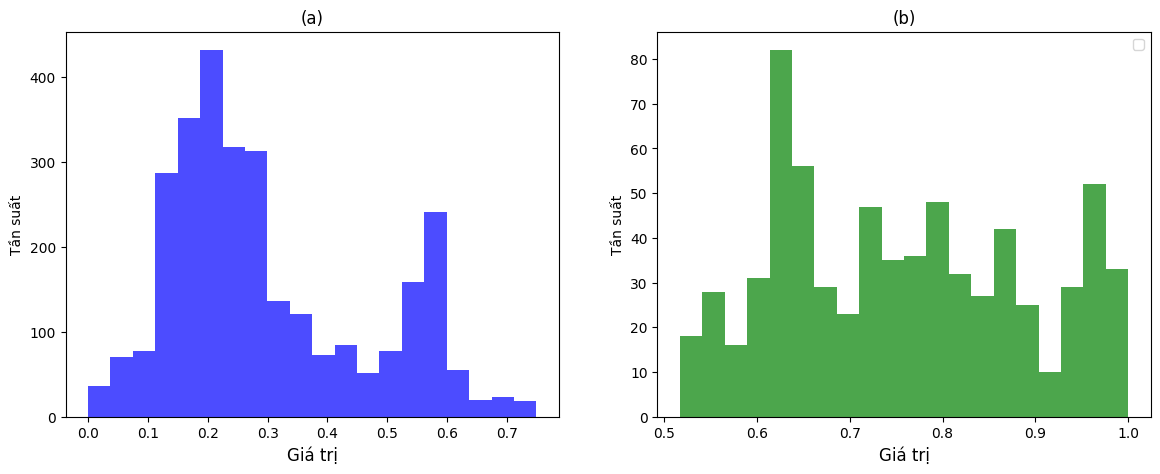

In [41]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.hist(y_train, bins=20, color='blue', alpha=0.7)
ax1.set_xlabel("Giá trị", fontsize=12)
ax1.set_ylabel("Tần suất")
ax1.set_title("(a)")
ax2.hist(y_test, bins=20, color='green', alpha=0.7)
ax2.set_xlabel("Giá trị", fontsize=12)
ax2.set_ylabel("Tần suất")
ax2.set_title("(b)")
ax2.legend()

In [ ]:
#Ket thuc phan lay va xu ly du lieu

Buoc 5: Xay dung va huan luyen mo hinh

In [ ]:
#GRU: Xay dung mo hinh

In [91]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(128,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(64))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 87,617
Trainable params: 87,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#GRU: Ket thuc xay dung mo hinh

In [ ]:
#LSTM: Xay dung mo hinh

In [16]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(64))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
#LSTM: Ket thuc xay dung mo hinh

In [ ]:
#GRU-LSTM hydrid: Xay dung mo hinh

In [79]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(64,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 64)            12864     
                                                                 
 gru_1 (GRU)                 (None, 50, 32)            9408      
                                                                 
 lstm (LSTM)                 (None, 50, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 59,553
Trainable params: 59,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#GRU-LSTM hydrid: Ket thuc xay dung mo hinh

In [ ]:
#LSTM-GRU hydrid: Xay dung mo hinh

In [22]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(64,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 50, 32)            12416     
                                                                 
 gru (GRU)                   (None, 50, 64)            18816     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 57,569
Trainable params: 57,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#LSTM-GRU hydrid: Ket thuc xay dung mo hinh

In [ ]:
#Huan luyen mo hinh

In [24]:
start_time = dt.datetime.now()
history1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=50,verbose=1)
end_time = dt.datetime.now()
execution_time = end_time - start_time
print("Thời gian thực thi: ", execution_time)

Epoch 1/100
59/59 [==============================] - 19s 160ms/step - loss: 0.0467 - val_loss: 0.0333
Epoch 2/100
59/59 [==============================] - 9s 144ms/step - loss: 0.0158 - val_loss: 0.0487
Epoch 3/100
59/59 [==============================] - 10s 167ms/step - loss: 0.0137 - val_loss: 0.0412
Epoch 4/100
59/59 [==============================] - 7s 124ms/step - loss: 0.0135 - val_loss: 0.0221
Epoch 5/100
59/59 [==============================] - 9s 157ms/step - loss: 0.0132 - val_loss: 0.0202
Epoch 6/100
59/59 [==============================] - 9s 151ms/step - loss: 0.0125 - val_loss: 0.0207
Epoch 7/100
59/59 [==============================] - 9s 145ms/step - loss: 0.0115 - val_loss: 0.0338
Epoch 8/100
59/59 [==============================] - 9s 158ms/step - loss: 0.0106 - val_loss: 0.0348
Epoch 9/100
59/59 [==============================] - 8s 135ms/step - loss: 0.0109 - val_loss: 0.0254
Epoch 10/100
59/59 [==============================] - 10s 169ms/step - loss: 0.0096 - val

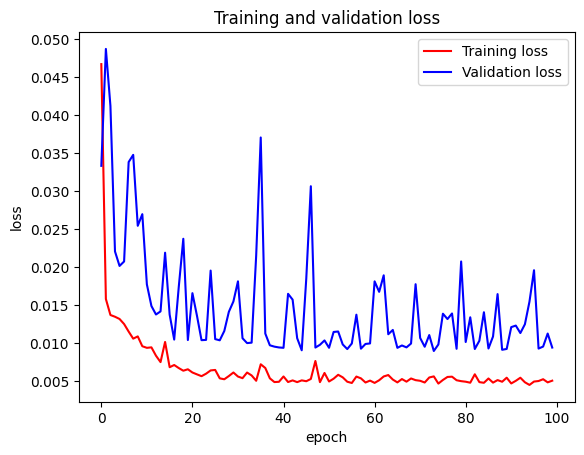

<Figure size 640x480 with 0 Axes>

In [27]:
# Summarize history for loss
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.locator_params(axis='y', nbins=10, tight=True)
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#Ket thuc huan luyen mo hinh

Buoc 6: Ap dung mo hinh

In [ ]:
#Ap dung mo hinh

In [28]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

22/22 [==============================] - 1s 36ms/step


((2946, 1), (699, 1))

In [ ]:
#Do thi phan bo y_train va traim_predict

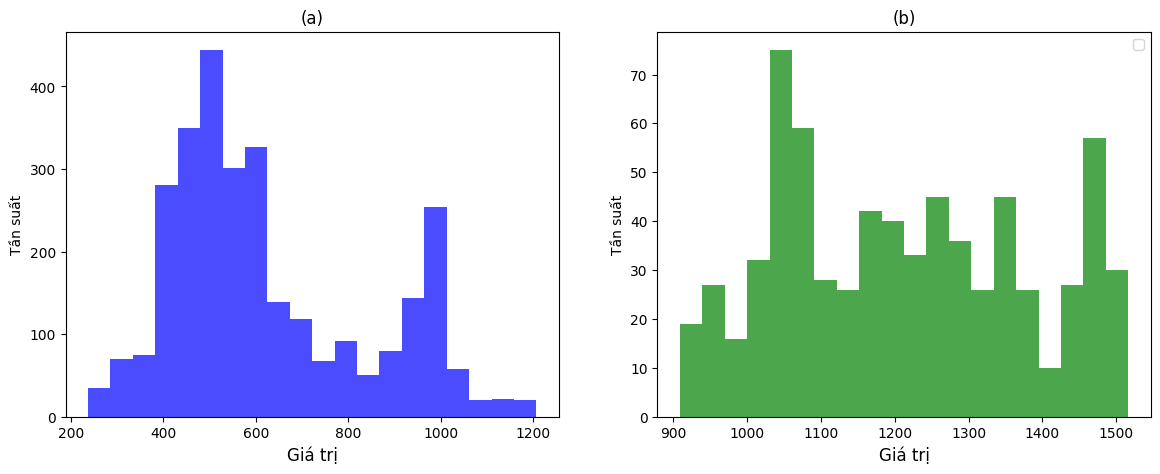

In [43]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.hist(train_predict, bins=20, color='blue', alpha=0.7)
ax1.set_xlabel("Giá trị", fontsize=12)
ax1.set_ylabel("Tần suất")
ax1.set_title("(a)")
ax2.hist(test_predict, bins=20, color='green', alpha=0.7)
ax2.set_xlabel("Giá trị", fontsize=12)
ax2.set_ylabel("Tần suất")
ax2.set_title("(b)")
ax2.legend()

In [29]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [30]:
# shift train predictions for plotting
close_stock = df.copy()
look_back=time_step
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Thực tế','Dự báo tập huấn luyện','Dự báo tập giám sát'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Chỉ số VNIndex','Date': 'Thời gian'})
fig.update_layout(title_text='Biểu đồ so sánh chỉ số VNIndex thực tế và dự báo', title_x=0.5,
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Chỉ số VNIndex')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3747, 1)
Test predicted data:  (3747, 1)


In [ ]:
#Ket thuc ap dung mo hinh

Buoc 7: Đo lường độ chính xác

In [ ]:
#Do luong

In [31]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print('Train data MAPE:',mean_absolute_percentage_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print('Test data MAPE:',mean_absolute_percentage_error(original_ytest,test_predict))

Train data R2 score: 0.9984083676051356
Train data explained variance regression score: 0.9986863675708659
Train data MGD:  0.0002065797793244218
Train data MPD:  0.11447817384440352
Train data RMSE:  8.508103838706942
Train data MSE:  72.3878309302198
Train data MAE:  6.126897133634924
Train data MAPE: 0.010607063343399902
-------------------------------------------------------------------------------------
Test data R2 score: 0.990354714096041
Test data explained variance regression score: 0.9904899663600724
Test data MGD:  0.00019384077085011069
Test data MPD:  0.23214534507754228
Test data RMSE:  16.82227434963415
Test data MSE:  282.98891429435906
Test data MAE:  12.1666366433074
Test data MAPE: 0.01001642667765792


In [ ]:
#Ket thu do luong

Buoc 8: Du bao

In [ ]:
#Ung dung mo hinh de bao 80 ngay tiep theo

In [32]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 50
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  50


In [34]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
[ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100]


In [35]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(df2[len(df2)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Dự báo 50 ngày đầu tiên','Dự báo 50 ngày kế tiếp'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Chỉ số VNIndex','index': 'Mốc thời gian'}, color_discrete_sequence=['blue','red'])
fig.update_traces(line_color='blue', selector=dict(name='Dự báo 50 ngày đầu tiên'))
fig.update_traces(line_color='red', selector=dict(name='Dự báo 50 ngày kế tiếp'))
for trace, name in zip(fig.data, names):
    trace.name = name
fig.update_layout(title_text='Biểu đồ xu hướng 50 ngày đầu và 50 ngày tiếp theo', title_x=0.5,
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Chỉ số VNIndex')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [39]:
lstmdf=df2.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Chỉ số VNIndex'])

fig = px.line(lstmdf,labels={'value': 'Chỉ số VNIndex','index': 'Mốc thời gian'})
fig.update_layout(title_text='Biểu đồ xu hướng chỉ số VNIndex', title_x=0.5,
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Xu hướng')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
plt.savefig('dothi.png')
fig.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
#Ket thu ung dung mo hinh du bao 80 ngay tiep theo

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(original_ytest, test_predict)
cm_train=confusion_matrix(original_ytrain,train_predict)
print(cm_test)
print(cm_train)